In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_wine

In [27]:
data = load_wine()

In [28]:
# Convert wine quality to binary: 1 (good) if quality ≥ 7, else 0
df['label'] = df['quality'].apply(lambda q: 1 if q >= 7 else 0)
X = df.drop(['quality', 'label'], axis=1)
y = df['label']

In [36]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [31]:
# Build Neural Network

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output: 0 or 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history =model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6836 - loss: 0.6080 - val_accuracy: 0.8242 - val_loss: 0.4554
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7897 - loss: 0.4802 - val_accuracy: 0.8477 - val_loss: 0.3697
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8548 - loss: 0.3863 - val_accuracy: 0.8477 - val_loss: 0.3164
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8691 - loss: 0.3269 - val_accuracy: 0.8477 - val_loss: 0.2881
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.3127 - val_accuracy: 0.8555 - val_loss: 0.2730
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.3219 - val_accuracy: 0.8672 - val_loss: 0.2647
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8572 - loss: 0.3272 - val_accuracy: 0.8750 - val_loss: 0.2565
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8732 - loss: 0.2787 - val_accuracy: 0.8867 - val_loss:

In [33]:
# Evaluate on test data
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

# Predictions and evaluation report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8703 - loss: 0.2675  
Test Accuracy: 0.8812500238418579
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       288
           1       0.35      0.22      0.27        32

    accuracy                           0.88       320
   macro avg       0.63      0.59      0.60       320
weighted avg       0.86      0.88      0.87       320

[[275  13]
 [ 25   7]]


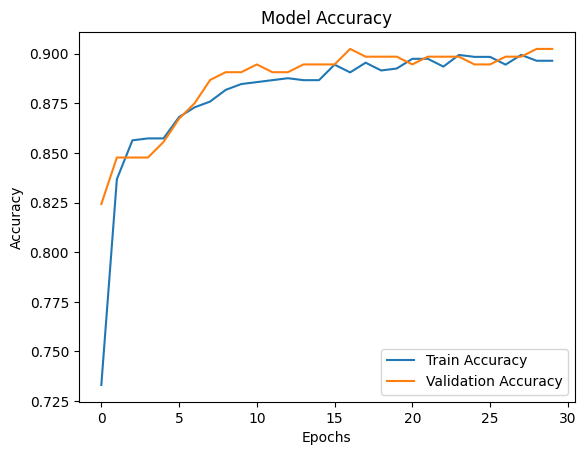

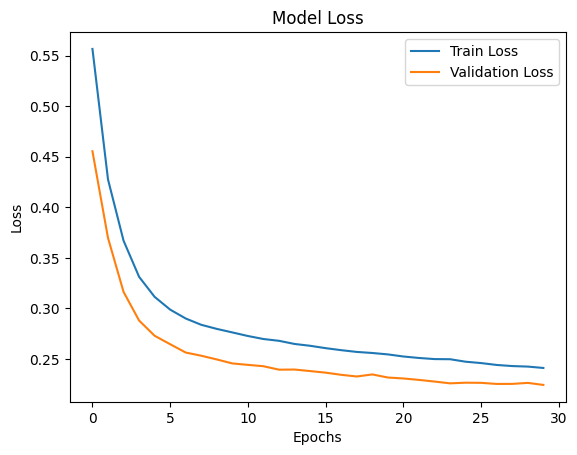

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()